Text(0.5, 1.0, '$f(t)$')

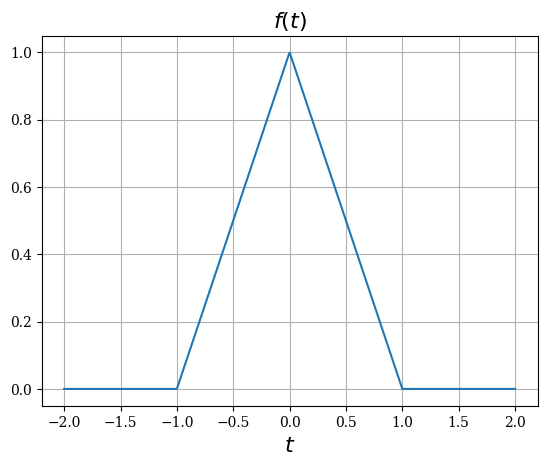

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    y=(1-abs(t))*(abs(t)<1)
    return np.float16(y)



# signal
a=-2.0
b=2.0
T=b-a    # période
nb_pts=1000
t=np.linspace(a,b,nb_pts)
plt.figure(1)
plt.plot(t,f(t))
plt.grid()
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.xlabel(f'$t$',fontsize=16)
plt.title(f'$f(t)$',fontsize=16)



"phenomene de gibs , due a la disconinuite "


Valeur moyenne =  0.2499913797006235
Energie totale =  0.16665525360031053
Erreur relative :  1.4582845794081503
[0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.
 7.25 7.5 ]


Text(0.5, 1.0, 'Spectre de fréquences')

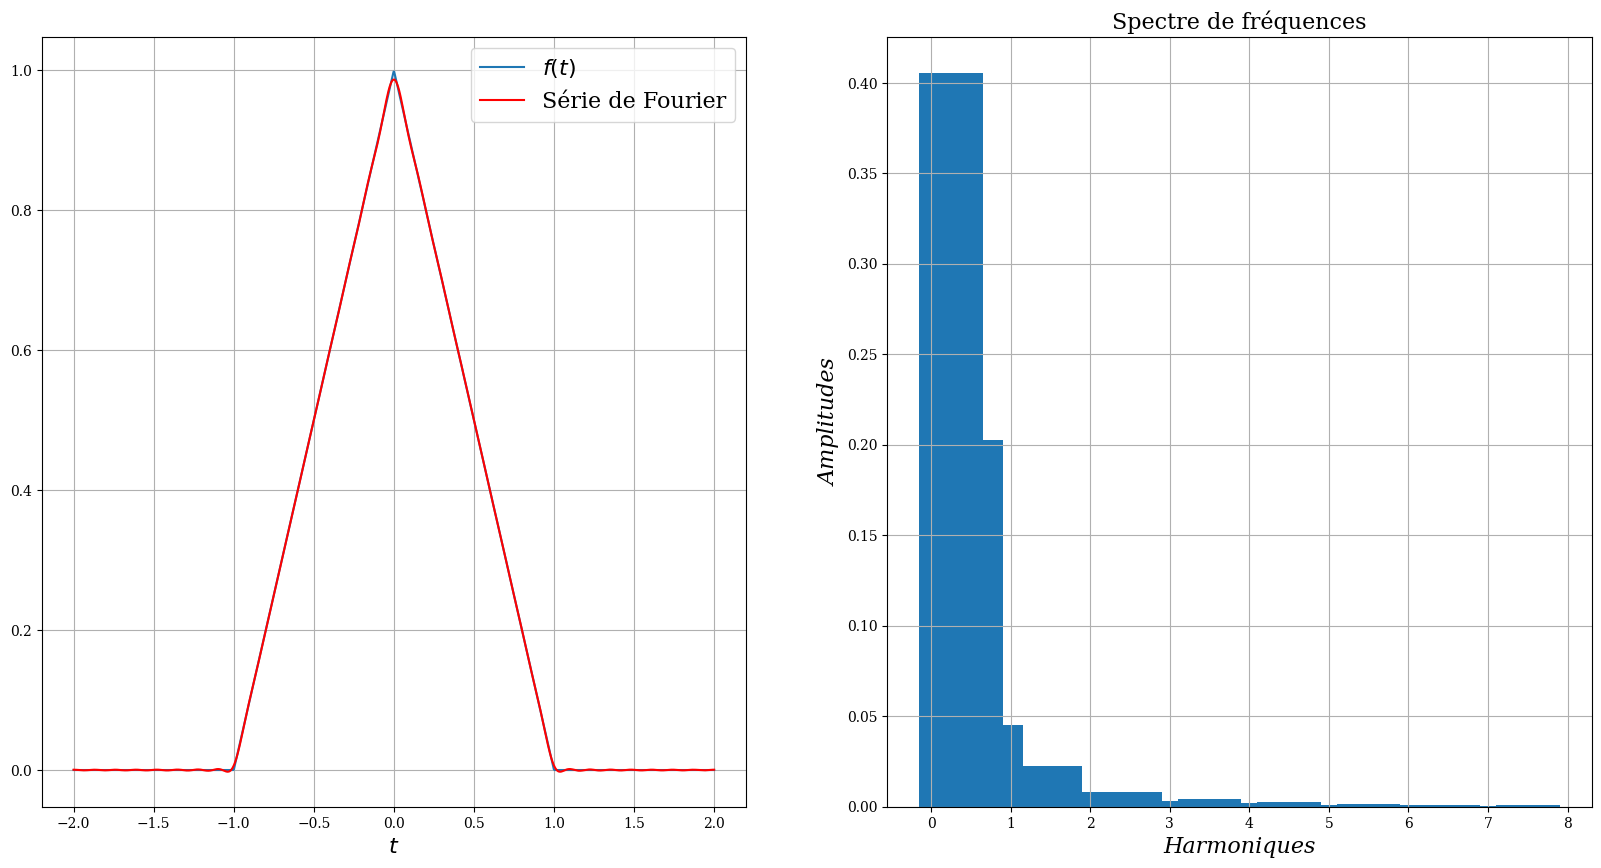

In [3]:
# pulsation
omega=2*np.pi/T  

# coefficient de Fourier a0 (valeur moyenne de f)
a0=(1/T)*np.trapezoid(f(t),t)
print('Valeur moyenne = ',a0)

# énergie totale du signal (carré de la valeur efficace)
E_tot=(1/T)*np.trapezoid(f(t)**2,t)
print('Energie totale = ',E_tot)

# nombre d'harmoniques
N=30

# initialisation du tableau contenant les amplitudes des harmoniques
An=np.zeros(N,dtype=float)

# initialisation de la série de Fourier S
S=a0

Vn=np.zeros(N,dtype=float)

# initialisation de la somme des énergies des harmoniques E
E=a0**2

# calcul de la série de Fourier et de la somme des énergies
for n in range(1,N+1):
    an=(2/T)*np.trapezoid(f(t)*np.cos(n*omega*t),t)
    bn=(2/T)*np.trapezoid(f(t)*np.sin(n*omega*t),t)
    S+=an*np.cos(n*omega*t)+bn*np.sin(n*omega*t)
    E+=an**2+bn**2
    An[n-1]=(an**2+bn**2)**0.5
    Vn[n-1]=(n*omega)/(2*np.pi)

# calcul de l'erreur relative sur l'énergie totale du signal
err=abs(E_tot-E/E_tot)
print('Erreur relative : ',err)

print(Vn)

# affichage du signal f(t) [en noir] et de la Série de Fourier associée [en rouge]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(t,f(t))
plt.plot(t,S,'r')
plt.grid()
plt.xlabel('$t$',fontsize=16,style='italic')
plt.legend(['$f(t)$','Série de Fourier'],loc='upper right',fontsize=16)

# affichage du spectre
plt.subplot(1,2,2)
plt.bar(Vn,An)
plt.grid()
plt.xlabel('Harmoniques',fontsize=16,style='italic')
plt.ylabel('Amplitudes',fontsize=16,style='italic')
plt.title('Spectre de fréquences',fontsize=16)